In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
train_path = '/content/drive/MyDrive/thesis/dataset/maxed_train.xlsx'
test_path = '/content/drive/MyDrive/thesis/dataset/test.xlsx'

In [8]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()



,text,classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger


In [9]:
len(train.text.value_counts())

15363

In [10]:
len(test.text.value_counts())

3840

In [11]:
train.shape

(21510, 2)

In [12]:
test.shape

(3840, 2)

In [13]:
train.dropna()

,text,classes
0,ভাই পনারা এখনো বেপারটা ভুজেন নাই বাংলা দেশের ব...,surprise
1,ইভ টিজিংয়ের প্রতিবাদ করায় বগুড়ায় বখাটেদের হামল...,anger
2,মনের মধ্যে যত ই কষ্ট থাক না কেন যে কোনো মানুষ ...,disgust
3,সেই টিভি আর ঘড়ি পাওয়া গেছে! (ছবি),joy
4,একমাত্র তোর কাছেই আগল খুলে ঝাঁপিয়ে\nপড়তে ভয় কর...,fear
...,...,...
21505,হাসপাতাল থেকে ছাড়া পেয়েছেন শচীন টেন্ডুলকার।,surprise
21506,সব ম্যাচ জিততে হবে এটা কেউ আশা করে না।,surprise
21507,"মানাবতাবাতী সুলতানা আপা কই,?",disgust
21508,এতো অনিয়মের কয়টার কথা মানুষ বলবে?,joy


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['encoded_classes'] = encoder.fit_transform(train['classes'])
train.head()

test['encoded_classes'] = encoder.fit_transform(test['classes'])
test.head()

,text,classes,encoded_classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy,3
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger,0


In [15]:
xtrain = train['text']
ytrain = train['encoded_classes']
xtest = test['text']
ytest = test['encoded_classes']

In [16]:
df = pd.DataFrame(xtest)
df1 = pd.DataFrame(ytest)

In [17]:
df.head()

,text
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,"
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...


In [18]:
df.shape

(3840, 1)

In [19]:
df1.shape

(3840, 1)

In [20]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [21]:
from transformers import AutoTokenizer, RobertaForSequenceClassification

In [22]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", problem_type="multi_label_classification")

In [23]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  5752


In [24]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [25]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from torch.utils.data import TensorDataset

In [27]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [28]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [29]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [32]:
checkpoint="cardiffnlp/twitter-roberta-base-emotion"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-emotion were not used when initializing RobertaModel: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [33]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [34]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [35]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3380


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [36]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.7298205441977146


Epoch 1:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.229149888605761


Epoch 2:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1332208972710829


Epoch 3:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.1029453982968302


Epoch 4:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.08680184776261


Epoch 5:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.0701411362935807


Epoch 6:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.0501501828255737


Epoch 7:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 7
Training loss: 1.0384662687425783


Epoch 8:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 8
Training loss: 1.0253446878060786


Epoch 9:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 9
Training loss: 1.0080430274884375


Epoch 10:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.9956578305487097


Epoch 11:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.97864059195716


Epoch 12:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.9678586315826552


Epoch 13:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.9549878341911813


Epoch 14:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.9403932651824499


Epoch 15:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.9265414562803753


Epoch 16:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.915140858063331


Epoch 17:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.9051454412866626


Epoch 18:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.8931899687947606


Epoch 19:   0%|          | 0/169 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.8887178901384568


In [37]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [38]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [39]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)

In [40]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.1959731419881185
Val F1 =  0.5457795480874079


In [41]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [42]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.534375


In [43]:
df2 = pd.DataFrame(predictions)
df2.shape

(3840, 6)

In [44]:
df3 = pd.DataFrame(true_vals)
df3.shape

(3840, 1)

In [45]:
df1.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df3.reset_index(inplace=True, drop=True)

In [46]:
df4 = pd.concat([df, df1, df2, df3], axis = 1)

In [47]:
df4.shape

(3840, 9)

In [48]:
df4.head()

,text,encoded_classes,0,1,2,3,4,5,0
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,3,-2.335982,-1.858826,-0.743552,7.929992,-1.881587,-2.517628,3
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",0,0.677689,-0.396393,-2.104670,-0.746039,0.795812,0.268957,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,3,-0.954052,0.002706,0.485325,-0.549363,-0.377155,0.168664,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,3,0.204194,-0.137409,-1.163682,-0.286013,-0.014078,0.414334,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,0,-1.671974,-0.522040,1.848329,-1.071836,-0.051155,-0.076912,0


In [49]:
df4.to_csv('/content/drive/MyDrive/thesis/roberta_output.csv')

In [50]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

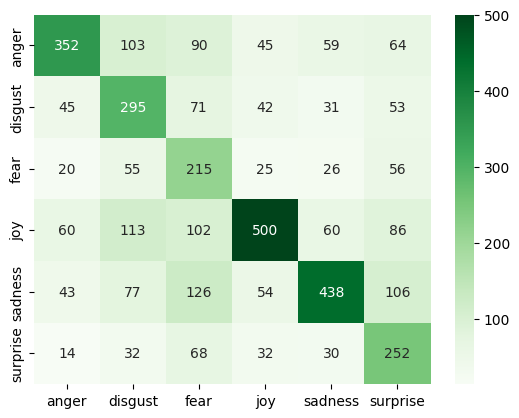

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

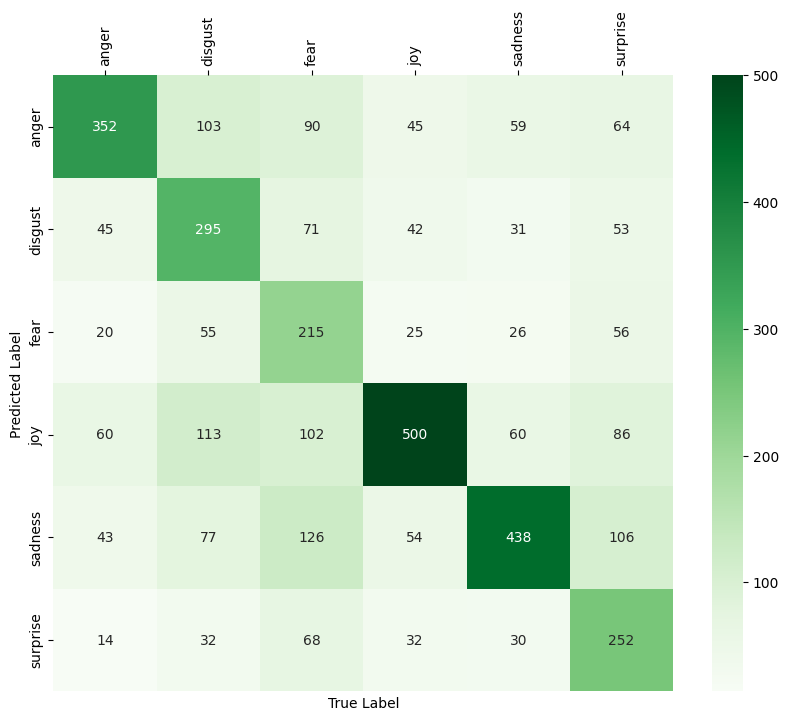

In [52]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [53]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,65.92,49.37,56.46,713.000000
disgust,43.70,54.93,48.68,537.000000
fear,31.99,54.16,40.22,397.000000
joy,71.63,54.29,61.77,921.000000
sadness,68.01,51.90,58.87,844.000000
surprise,40.84,58.88,48.23,428.000000
accuracy,53.44,53.44,53.44,0.534375
macro avg,53.68,53.92,52.37,3840.000000
weighted avg,58.34,53.44,54.58,3840.000000
